### Loading Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

### Loading Data

In [2]:
train=pd.read_csv("C:/Users/lenovo/Desktop/Data Scientist/train.csv")
test=pd.read_csv("C:/Users/lenovo/Desktop/Data Scientist/test.csv")

In [3]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


{'whiskers': [<matplotlib.lines.Line2D at 0x949a7f3c88>,
 'caps': [<matplotlib.lines.Line2D at 0x949a7f3f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x949a7f3860>],
 'medians': [<matplotlib.lines.Line2D at 0x94afd2c9e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x94afd2cd30>],
 'means': []}

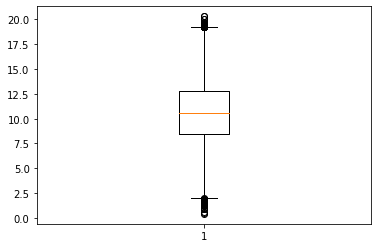

In [4]:
 #Plot boxplot to visualize Outliers
 %matplotlib inline  
 plt.boxplot(train['var_0'])

In [5]:
numerical_features=train.columns[2:]
df_train=train.loc[:,numerical_features]

In [6]:
df_train

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,3.5855,5.9790,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,-4.3781,7.9232,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,7.1971,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,-3.1882,9.0827,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,0.1287,7.9682,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


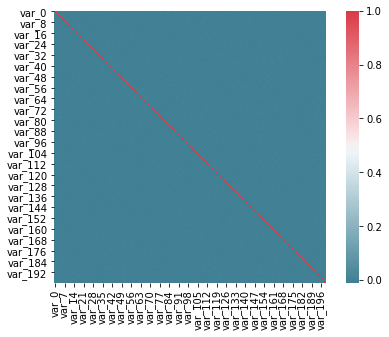

In [7]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_train.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#We find out that the redundancy is very less between the variables.

### Plotting Customer Response

In [8]:
#Replacing 0's and 1's to yes or no for better prediction
train['target']=train['target'].replace(0,'No')
train['target']=train['target'].replace(1,'Yes')
target=train['target']

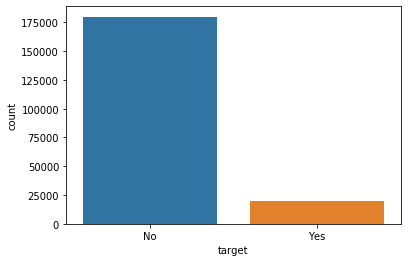

In [9]:
sns.countplot(train['target'])

In [10]:
#We observe that around 90% of the customers wont do the transaction and 10% will, i.e, we have an imbalance dataset

In [11]:
train=train.drop(['target','ID_code'],axis=1)

In [12]:
train.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,5.9525,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,8.2450,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,7.6784,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


### Missing Value Analysis

In [15]:
train.isnull().sum()

var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
var_29     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 200, dtype: int64

In [16]:
test.isnull().sum()

ID_code    0
var_0      0
var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
var_6      0
var_7      0
var_8      0
var_9      0
var_10     0
var_11     0
var_12     0
var_13     0
var_14     0
var_15     0
var_16     0
var_17     0
var_18     0
var_19     0
var_20     0
var_21     0
var_22     0
var_23     0
var_24     0
var_25     0
var_26     0
var_27     0
var_28     0
          ..
var_170    0
var_171    0
var_172    0
var_173    0
var_174    0
var_175    0
var_176    0
var_177    0
var_178    0
var_179    0
var_180    0
var_181    0
var_182    0
var_183    0
var_184    0
var_185    0
var_186    0
var_187    0
var_188    0
var_189    0
var_190    0
var_191    0
var_192    0
var_193    0
var_194    0
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 201, dtype: int64

In [10]:
#We observe that there are no missing values in both the train and test data set

### Correlation Analysis

Text(0.5, 1, 'Pearson Correlation')

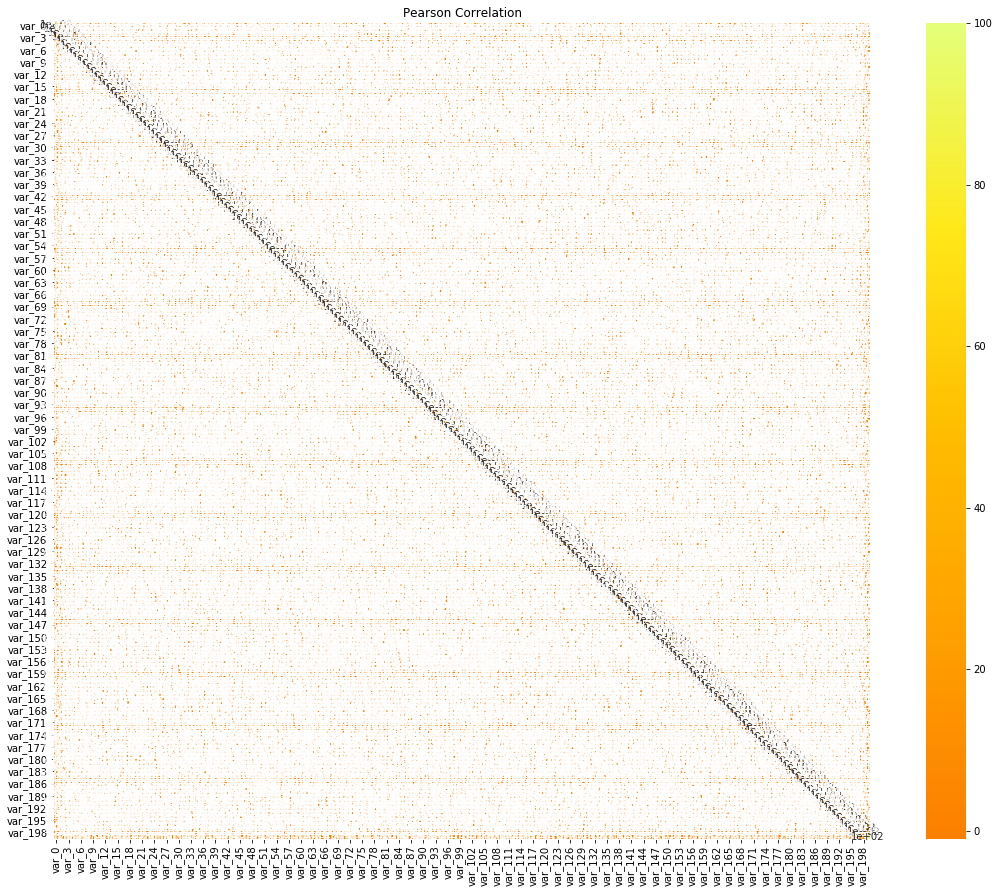

In [12]:
plt.figure(figsize=(20,15))
sns.heatmap(train.corr()*100, square=True, annot=True, cmap='Wistia_r')
plt.title('Pearson Correlation')

In [ ]:
#We observe that there is very less correlatin among the variables so we dont have to drop any column.

###  Modelling

##### Splitting the data into training and test set

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, confusion_matrix
x = train
y = target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((160000, 200), (40000, 200), (160000,), (40000,))

#### Feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [19]:
x_train.shape

(160000, 200)

### Model Evaluation


#### Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(x_train,y_train)

#
y_pred=logreg.predict(x_test)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
from sklearn import metrics
a=accuracy_score(y_test,y_pred)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)
print("Accuracy: %f"%a)

Confusion Matrix:
[[35498   500]
 [ 2954  1048]]
Accuracy: 0.913650


In [39]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('FScore: {}'.format(fscore))

Precision: [0.92317695 0.67700258]
Recall: [0.98611034 0.26186907]
FScore: [0.95360645 0.37765766]


#### Decision Tree

In [18]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

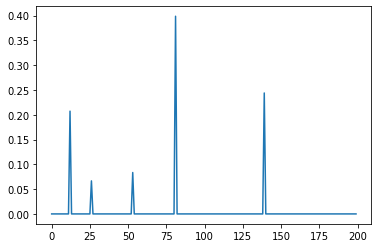

In [19]:
plt.plot(clf_gini.feature_importances_)

In [20]:
dt_pred = clf_gini.predict(x_test)
dt_pred

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, average_precision_score
accu_score=accuracy_score(y_test,dt_pred)*100
print("Accuracy score %f" % accu_score)
c=confusion_matrix(y_test,dt_pred)
print("Confusion Matrix:")
print(c)

Accuracy score 89.980000
Confusion Matrix:
[[35969    29]
 [ 3979    23]]


In [ ]:
#So the accuracy is 89% here, which means the model we selected has classified the data correctly with an accuarcy of 89%

In [59]:
c=pd.crosstab(y_test,dt_pred)

In [60]:
c

col_0,No,Yes
target,,
No,35969,29
Yes,3979,23


In [40]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, dt_pred)
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('FScore: {}'.format(fscore))

Precision: [0.90039551 0.44230769]
Recall: [0.9991944  0.00574713]
FScore: [0.94722566 0.01134682]


In [24]:
y_test.head()

188807     No
199122     No
17944      No
199504    Yes
168703     No
Name: target, dtype: object

In [25]:
TP=c[0][0]
FP=c[0][1]
FN=c[1][0]
TN=c[1][1]
print("True Positive: %d"%TP)
print("False Positive: %d"%FP)
print("False Negative: %d"%FN)
print("True Negative: %d"%TN)


True Positive: 35969
False Positive: 29
False Negative: 3979
True Negative: 23


#### Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=20, random_state=0,criterion="gini",max_depth=100)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [23]:
print("Accuracy score %f" % accuracy_score(y_test,rf_pred))
d=confusion_matrix(y_test,rf_pred)
print(d)

Accuracy score 0.900475
[[35992     6]
 [ 3975    27]]


In [28]:
TP=d[0][0]
FP=d[0][1]
FN=d[1][0]
TN=d[1][1]
print("True Positive: %d"%TP)
print("False Positive: %d"%FP)
print("False Negative: %d"%FN)
print("True Negative: %d"%TN)

True Positive: 35992
False Positive: 6
False Negative: 3975
True Negative: 27


In [37]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, rf_pred)
print('Precision: {}'.format(precision))
print('Recall: {}'.format(recall))
print('FScore: {}'.format(fscore))

Precision: [0.90054295 0.81818182]
Recall: [0.99983332 0.00674663]
FScore: [0.94759429 0.0133829 ]


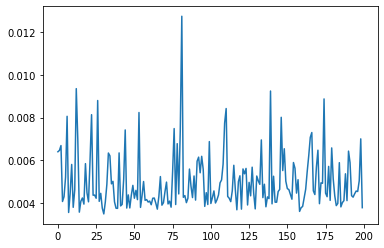

In [30]:
plt.plot(classifier.feature_importances_)

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(test.iloc[:,1:])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
test_data_std=pd.DataFrame(sc.transform(test.iloc[:,1:]))

In [33]:
(pd.DataFrame(classifier.predict(test_data_std))).shape

(200000, 1)

In [34]:
predictions=classifier.predict(test_data_std)

In [35]:
test_data_std['target']=predictions

In [36]:
test_data_std.to_csv('test_data_std.csv')

In [38]:
test_data_std

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,target
0,0.133982,2.327446,0.852790,1.286580,0.220422,0.339302,0.502075,0.507628,0.556964,1.007087,...,1.451559,-2.267588,-0.218044,-1.364614,1.818985,0.380899,1.962828,-0.131945,-0.526357,No
1,-0.700870,0.712423,0.226756,-0.780630,-1.162422,0.132014,0.699025,0.613951,-1.407056,-1.295199,...,0.455057,-0.665993,1.703425,-0.770691,0.427340,-0.693329,1.041340,1.083560,-1.705010,No
2,-1.704490,-2.161579,-0.215177,0.126508,-0.503324,1.887818,-0.601566,1.087629,0.373846,0.628960,...,1.168601,0.036728,-0.285819,-1.597018,1.582008,-1.725840,-2.009582,1.338254,-1.916905,No
3,-0.698565,0.074754,0.499091,-0.103918,-1.379935,1.045199,-0.549870,1.178826,0.929500,-0.090601,...,0.534953,-0.181048,0.064893,-0.894583,2.307698,0.305857,0.344306,-0.948042,-0.092749,No
4,0.344802,0.369148,1.299241,0.468835,-1.220512,-0.449119,1.670363,-1.730001,0.813551,-0.345580,...,0.566588,-0.434095,0.013961,0.495832,-0.106558,-1.368278,-1.763736,-0.645853,-0.571065,No
5,-1.538685,-0.165093,-0.797929,0.136544,1.961147,-0.460721,-1.351319,-0.515683,0.480555,-0.231525,...,-0.112545,-1.588449,1.390555,-0.972147,-1.455886,-1.526568,0.976512,0.413306,1.353104,No
6,-0.723263,-1.109332,-1.270806,0.718309,0.577809,-0.274071,-1.443492,-1.006941,-1.373247,-1.015785,...,-0.195747,1.467035,1.383121,-0.157919,0.114122,1.001298,0.258955,0.865626,0.807443,No
7,2.188147,-0.197242,1.021856,0.785098,0.000805,1.867448,0.629636,0.385039,-1.525165,-0.085324,...,-1.003863,-0.672750,-0.456157,-0.869938,-1.160714,0.778634,1.708186,2.523978,0.382230,No
8,-1.209579,0.609935,1.142287,-0.980804,-1.483495,-1.106855,-1.245038,-0.567925,0.693343,-0.282424,...,0.137886,0.367480,-0.840481,-0.408377,0.178892,-0.683708,1.094874,0.371361,-0.008084,No
9,-0.091427,-1.314332,1.504072,1.123333,0.513100,-0.730848,-2.271771,1.095776,-0.506495,-0.673214,...,1.194649,-0.699507,0.361895,-0.908879,0.518410,-1.236722,0.723608,-0.018142,1.210941,No
